# Differences Between Linear Regression and Logistic Regression

## 1. Purpose and Use Cases

### Linear Regression:
- Used for regression tasks where the goal is to predict a continuous numeric value.
- **Example**: Predicting house prices, temperature, stock prices, or sales revenue.

### Logistic Regression:
- Used for classification tasks where the goal is to predict a category or class label.
- **Example**: Predicting whether an email is spam (yes/no), whether a customer will churn (yes/no), or whether a tumor is malignant (yes/no).

## 2. Type of Output

### Linear Regression:
- Outputs a continuous value that can range from negative infinity to positive infinity.
- **Example**: A house price prediction might output $300,000$, $500,000$, etc.

### Logistic Regression:
- Outputs a probability value between 0 and 1, which is then mapped to a binary class (e.g., 0 or 1).
- **Example**: A probability of 0.8 might mean "spam" (1), while 0.2 might mean "not spam" (0).

## 3. Mathematical Function

### Linear Regression:
- Uses a linear equation to model the relationship between input features and the output.
- **Equation**: 
  $$ y = mx + b $$
  where:
  - $ y $ = predicted output (continuous value),
  - $ m $ = slope (weight of the feature),
  - $ x $ = input feature,
  - $ b $ = intercept.

### Logistic Regression:
- Uses a sigmoid function (also called the logistic function) to map the output to a probability.
- **Equation**: 
  $$ P(y=1) = \frac{1}{1 + e^{-(mx + b)}} $$
  where:
  - $ P(y=1) $ = probability of the output being 1 (e.g., spam),
  - $ e $ = base of natural logarithms (~2.718),
  - $ mx + b $ = linear combination of inputs (like in linear regression).


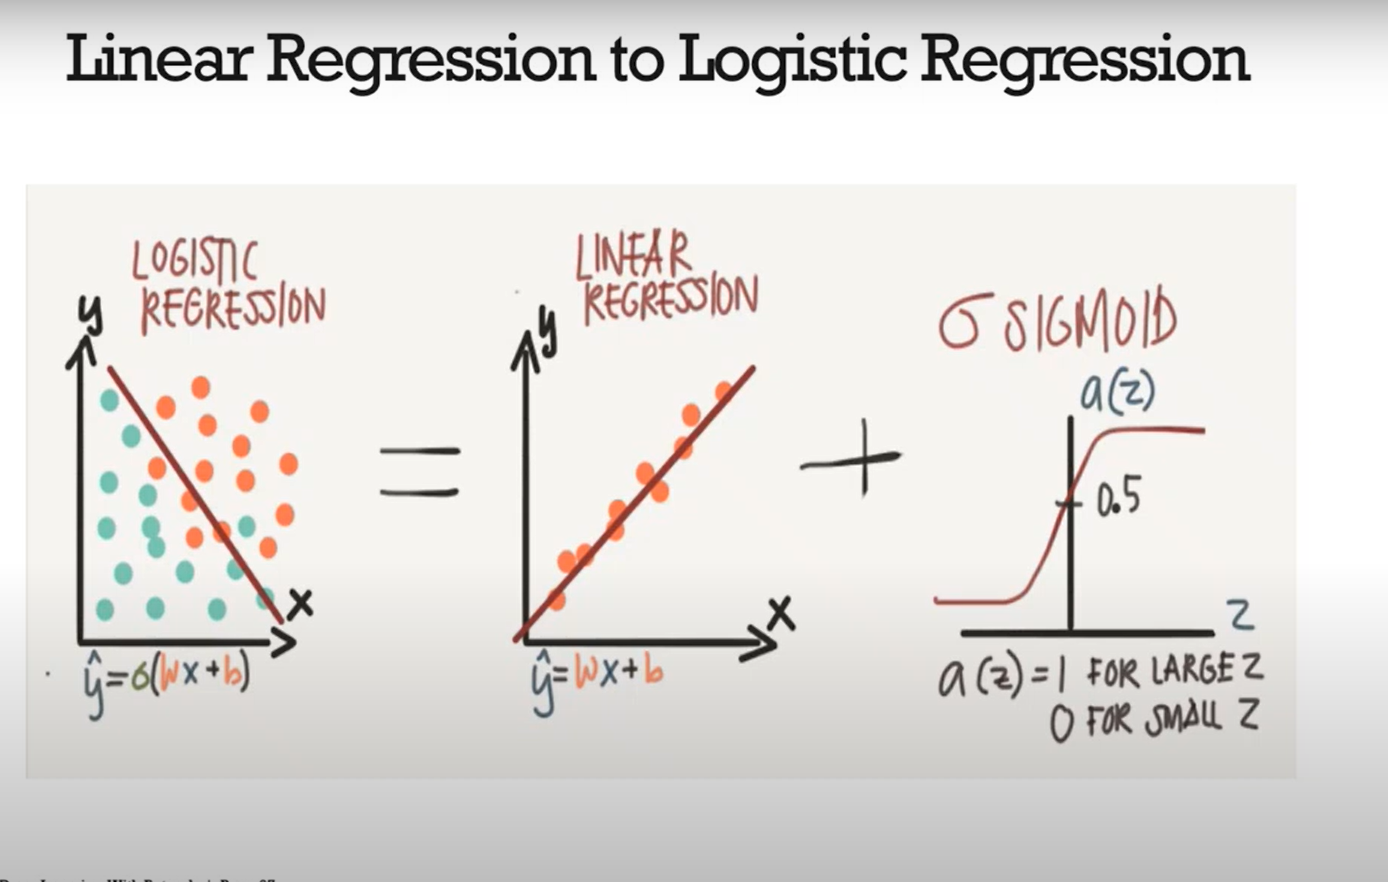

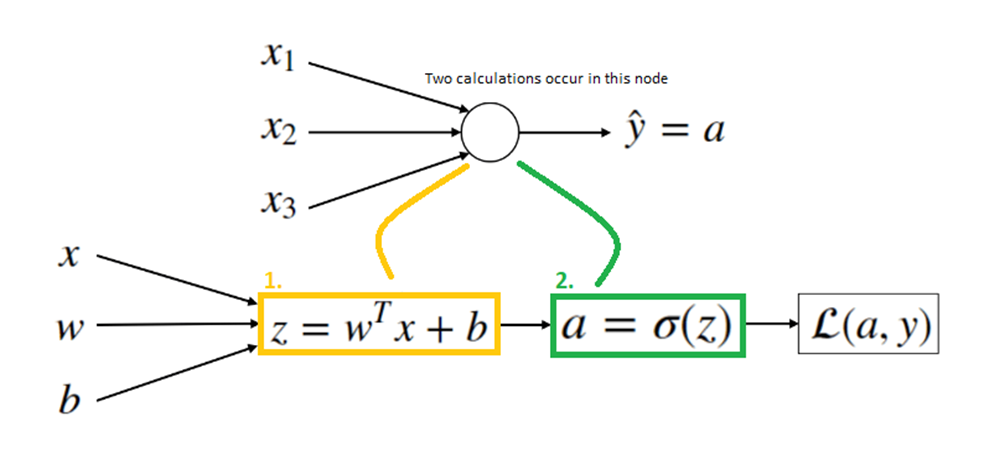

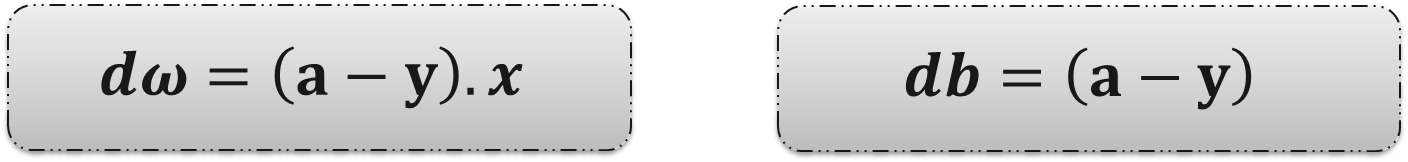

In [10]:
import numpy as np


def sigmoid(x):
    return (1/(1+np.exp(-x)))


class LogisticRegression:

    def __init__(self , lr=0.001 , n_iter=1000):

        self.lr = lr
        self.n_iter = n_iter
        self.weights = None
        self.bias = None

    def fit(self,X_train , y_train):

        n_samples , n_features = X_train.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iter):
            linear_pred = np.dot(X_train,self.weights) + self.bias
            y_pred = sigmoid(linear_pred)

            dw = (1/n_samples) * np.dot(X_train.T,(y_pred-y_train))# y_pred = a
            db = (1/n_samples) * np.sum(y_pred-y_train)

            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

    def predict(self,X_test):

        linear_pred = np.dot(X_test,self.weights) + self.bias
        y_probs = sigmoid(linear_pred)
        y_preds = [1 if i>=0.5 else 0 for i in y_probs]
        return y_preds

In [11]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

bc = datasets.load_breast_cancer()

X , y = bc.data , bc.target

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=0)

clf = LogisticRegression()

In [13]:
clf.fit(X_train,y_train)
preds = clf.predict(X_test)

C:\Users\SENAR7\AppData\Local\Temp\1\ipykernel_22556\1802157110.py:5: RuntimeWarning: overflow encountered in exp
  return (1/(1+np.exp(-x)))


In [14]:
def accuracy(preds,actual):
    return np.mean(preds==actual)

In [15]:
accuracy(preds,y_test)

0.8596491228070176